In [280]:
#pd.reset_option('all')

In [281]:
#importing the required libraries
import pandas as pd , numpy as np, matplotlib.pyplot as plt, warnings ,seaborn as sns

In [282]:
#For the output of plotting commands to be displayed inline
%matplotlib inline

#To Suppress Warnings
warnings.filterwarnings("ignore")
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)


In [283]:
loan_df= pd.read_csv("loan.csv")

In [284]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [285]:
loan_df.shape

(39717, 111)

In [286]:
loan_df.columns = loan_df.columns.str.replace(' ', '')

In [287]:
loan_df.dropna(how='all',axis=1,inplace=True)

In [288]:
loan_df.shape

(39717, 57)

In [289]:
data_dict= pd.read_excel("Data_Dictionary.xlsx")
data_dict.dropna(how='all', axis='columns',inplace=True)
data_dict.dropna(how='any', axis='rows',inplace=True)

In [290]:
data_dict.set_index('LoanStatNew',inplace=True)

In [291]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


In [292]:
pd.reset_option('max_colwidth')

 ## doubts on variables   
    - open_acc	
    - pub_rec	
    - revol_bal	
    - revol_util	
    - total_acc
    - initial_list_status
    - collections_12_mths_ex_med
    - policy_code
    - acc_now_delinq
    - chargeoff_within_12_mths
    - delinq_amnt	

In [293]:
non_driving_variables = ['funded_amnt','funded_amnt_inv','url','delinq_2yrs','inq_last_6mths','mths_since_last_delinq',
                         'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                        ]


In [294]:
loan_df.drop(columns=non_driving_variables,axis=1,inplace=True)

In [295]:
loan_df.shape

(39717, 39)

In [296]:
loan_df.columns.values

array(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'], dtype=object)

In [297]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*


In [298]:
pd.reset_option('max_colwidth')

In [299]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [300]:
def zero_NA_percentage(col):
    col.value_counts(dropna=False).plot.pie(autopct='%.2f',figsize=(4,4))
    plt.show()

### tax_liens - All the values are either 0 or NA

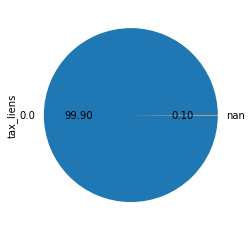

In [301]:
zero_NA_percentage(loan_df['tax_liens'])

In [302]:
loan_df.drop(columns=['tax_liens'],axis=1,inplace=True)

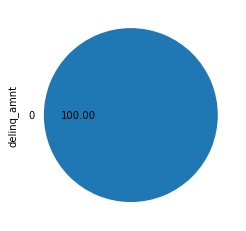

In [303]:
zero_NA_percentage(loan_df['delinq_amnt'])

In [304]:
loan_df.drop(columns=['delinq_amnt'],axis=1,inplace=True)

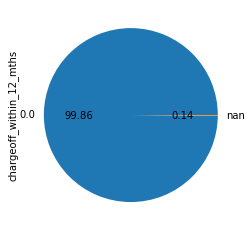

In [305]:
zero_NA_percentage(loan_df['chargeoff_within_12_mths'])

In [306]:
loan_df.drop(columns=['chargeoff_within_12_mths'],axis=1,inplace=True)

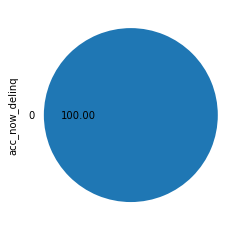

In [307]:
zero_NA_percentage(loan_df['acc_now_delinq'])

In [308]:
loan_df.drop(columns=['acc_now_delinq'],axis=1,inplace=True)

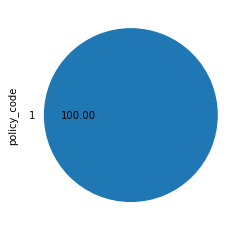

In [309]:
zero_NA_percentage(loan_df['policy_code'])

In [310]:
loan_df.drop(columns=['policy_code'],axis=1,inplace=True)

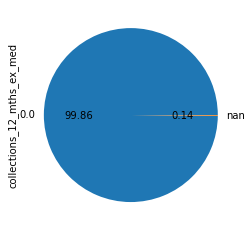

In [311]:
zero_NA_percentage(loan_df['collections_12_mths_ex_med'])

In [312]:
loan_df.drop(columns=['collections_12_mths_ex_med'],axis=1,inplace=True)

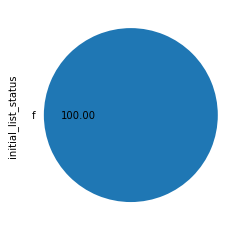

In [313]:
zero_NA_percentage(loan_df['initial_list_status'])

In [314]:
loan_df.drop(columns=['initial_list_status'],axis=1,inplace=True)

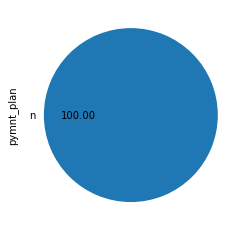

In [315]:
zero_NA_percentage(loan_df['pymnt_plan'])

In [316]:
loan_df.drop(columns=['pymnt_plan'],axis=1,inplace=True)

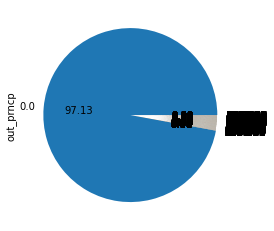

In [317]:
zero_NA_percentage(loan_df['out_prncp'])

In [318]:
loan_df.drop(columns=['out_prncp'],axis=1,inplace=True)

In [319]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [320]:
loan_df.shape

(39717, 30)

In [372]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            38577 non-null  float64
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  int64  
 12  loan_status           38577 non-null  int64  
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

#### check to see if any numeric column types needs to be corrected

In [322]:
loan_df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

#### check rows and columns with  missing values
     39717 total entries
     

In [323]:
(len(loan_df.desc)-loan_df.desc.count())/len(loan_df.desc)* 100

32.58050708764509

In [324]:
loan_df.drop(columns=['desc'],axis=1,inplace=True)

In [325]:
loan_df.shape

(39717, 29)

In [326]:

(len(loan_df.mths_since_last_record)-loan_df.mths_since_last_record.count())/len(loan_df.mths_since_last_record)* 100

92.98537150338646

In [327]:
loan_df.drop(columns=['mths_since_last_record'],axis=1,inplace=True)

##### dropping id and member_id , since they wont be affect any analysis

In [328]:
loan_df.drop(columns=['id'],axis=1,inplace=True)
loan_df.drop(columns=['member_id'],axis=1,inplace=True)

In [329]:
loan_df.shape

(39717, 26)

## Final dataframe after data cleaning of missing and empty columns

In [330]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  title                 39706 non-null  object 
 15  zip_code           

In [331]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."


In [332]:
pd.reset_option('max_colwidth')

# Data Analysis

In [333]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

###  dropping rows with loan _status as Current

In [334]:
loan_df=loan_df[~(loan_df.loan_status=='Current')]

In [335]:
loan_df.shape

(38577, 26)

#### putting 1 or 0 for Fully Paid and Charged Off respectively , so that it can be treated for  numerical analysis 

In [336]:
loan_df.loan_status= loan_df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

### converting term to int and trimming months from it

In [337]:
loan_df.term= loan_df.term.apply(lambda x:int(x.split()[0]))

In [338]:
loan_df.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

### converting int_rate to float  and trimming % from it 

In [339]:
loan_df.int_rate= loan_df.int_rate.apply(lambda x:float(x.split('%')[0]))

In [340]:
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### converting emp_length to int

In [341]:
loan_df.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

In [342]:
loan_df.emp_length=loan_df.emp_length.fillna(value=0)

### Assumptions
    - 10+ years = 10
    - <1 year = .5
    - NaN = 0

In [345]:
loan_df.emp_length=loan_df.emp_length.apply(lambda x: float(10) if x=="10+ years" else
                                            ( float(0.5) if x=="< 1 year" else float(str(x).split()[0])))

### handling date types of issue_d
    - converting into datetime
    -Since all the values are of year 2021, extracting just the month

In [ ]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%d-%b').dt.month

In [374]:
loan_df.issue_d.value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_d, dtype: int64

#### handling zip_code 
    - extracting the first 3 code from the column
    

In [375]:
loan_df.zip_code= loan_df.zip_code.apply(lambda x:int(x.rstrip('x')))

In [376]:
loan_df.zip_code.head()

0    860
1    309
2    606
3    917
5    852
Name: zip_code, dtype: int64

### Univariate Analysis

In [346]:
#loan_amnt
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

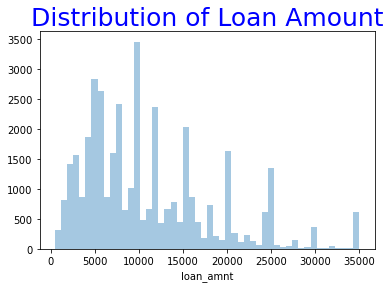

In [347]:
sns.distplot(loan_df.loan_amnt,kde=False)
plt.title("Distribution of Loan Amount",fontsize=25,color="b")
plt.show()

 - We can see peaks at round amounts like 5000,10000,15000,25000 etc
 - 10000 is the most favoured amount and 35000 is the max loan amount applied for 
    


In [370]:
loan_df_intTypes = loan_df.select_dtypes(include = ['float64', 'int64'])
loan_df_intTypes.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,10.0,24000.0,12,1,27.65,3,0,13648,9,0.0
1,2500,60,15.27,59.83,0.5,30000.0,12,0,1.00,3,0,1687,4,0.0
2,2400,36,15.96,84.33,10.0,12252.0,12,1,8.72,2,0,2956,10,0.0
3,10000,36,13.49,339.31,10.0,49200.0,12,1,20.00,10,0,5598,37,0.0
5,5000,36,7.90,156.46,3.0,36000.0,12,1,11.20,9,0,7963,12,0.0


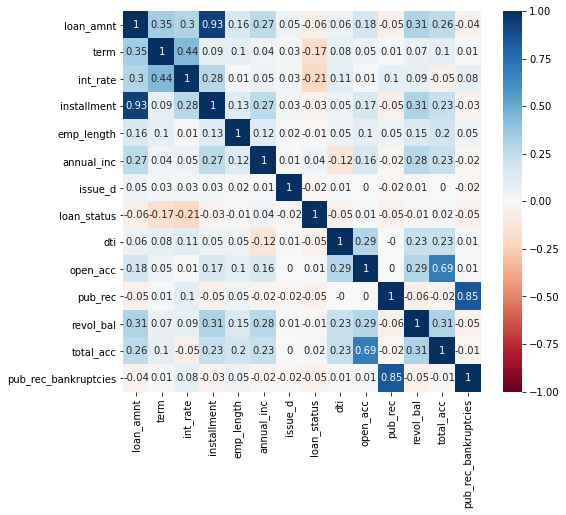

In [371]:
plt.figure(figsize=(8,7))
corrmat = loan_df.corr() 
sns.heatmap(round(corrmat,2), cmap='RdBu', annot=True, annot_kws={"size": 10}, vmin=-1, vmax=1); 
plt.show()